In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [2]:
data = pd.read_csv("/media/rakshith/Seagate Expansion Drive/mraks/Landsat.csv")

In [3]:
df2=data.iloc[6000:10000, 0:4]
Pwat1 = df2['Pwat'].values
P1 = df2['(P-E)'].values

In [4]:
Qdiv = data['Qdiv'].values
Pwat = data['Pwat'].values
P = data['(P-E)'].values
TGMS = data['TGMS'].values

rec = []
for i in range(len(Pwat)):
        rec.append(1/Pwat[i])

w, x, y, z = Qdiv, Pwat, P, TGMS
w1, x1, y1, z1, rec1 = Qdiv[0:200], Pwat[0:200], P[0:200], TGMS[0:200], rec[0:200]
w2, x2, y2, z2, rec2 = Qdiv[12000:12200], Pwat[12000:12200], P[12000:12200], TGMS[12000:12200], rec[12000:12200]
#w2, x2, y2, z2, rec2 = Qdiv[11000:11200], Pwat[11000:11200], P[11000:11200], TGMS[11000:11200], rec[11000:11200]
w3, x3, y3, z3, rec3 = Qdiv[21840:], Pwat[21840:], P[21840:], TGMS[21840:], rec[21840:]

In [5]:
# define the true objective function
def objective(x, a, b, c):
	return a * x**2 + b * x + c

x_line = np.linspace(np.min(rec), np.max(rec), 100)

popt, _ = curve_fit(objective, rec, z)
a, b, c = popt
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c)) 
y_line = objective(x_line, a, b, c)

popt1, _ = curve_fit(objective, rec1, z1)
a1, b1, c1 = popt1
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a1, b1, c1)) 
y_line1 = objective(x_line, a1, b1, c1)

popt2, _ = curve_fit(objective, rec2, z2)
a2, b2, c2 = popt2
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a2, b2, c2)) 
y_line2 = objective(x_line, a2, b2, c2)

popt3, _ = curve_fit(objective, rec3, z3)
a3, b3, c3 = popt3
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a3, b3, c3)) 
y_line3 = objective(x_line, a3, b3, c3)

y = 14078.80284 * x^2 + -783.80254 * x + 11.88674
y = 19192.61192 * x^2 + -1177.54549 * x + 18.88280
y = 27653.20428 * x^2 + -1304.07222 * x + 16.07086
y = 19059.73029 * x^2 + -891.43362 * x + 11.12641


Text(0.5, 1.0, 'Yearly data from TraCE (JJA averages)')

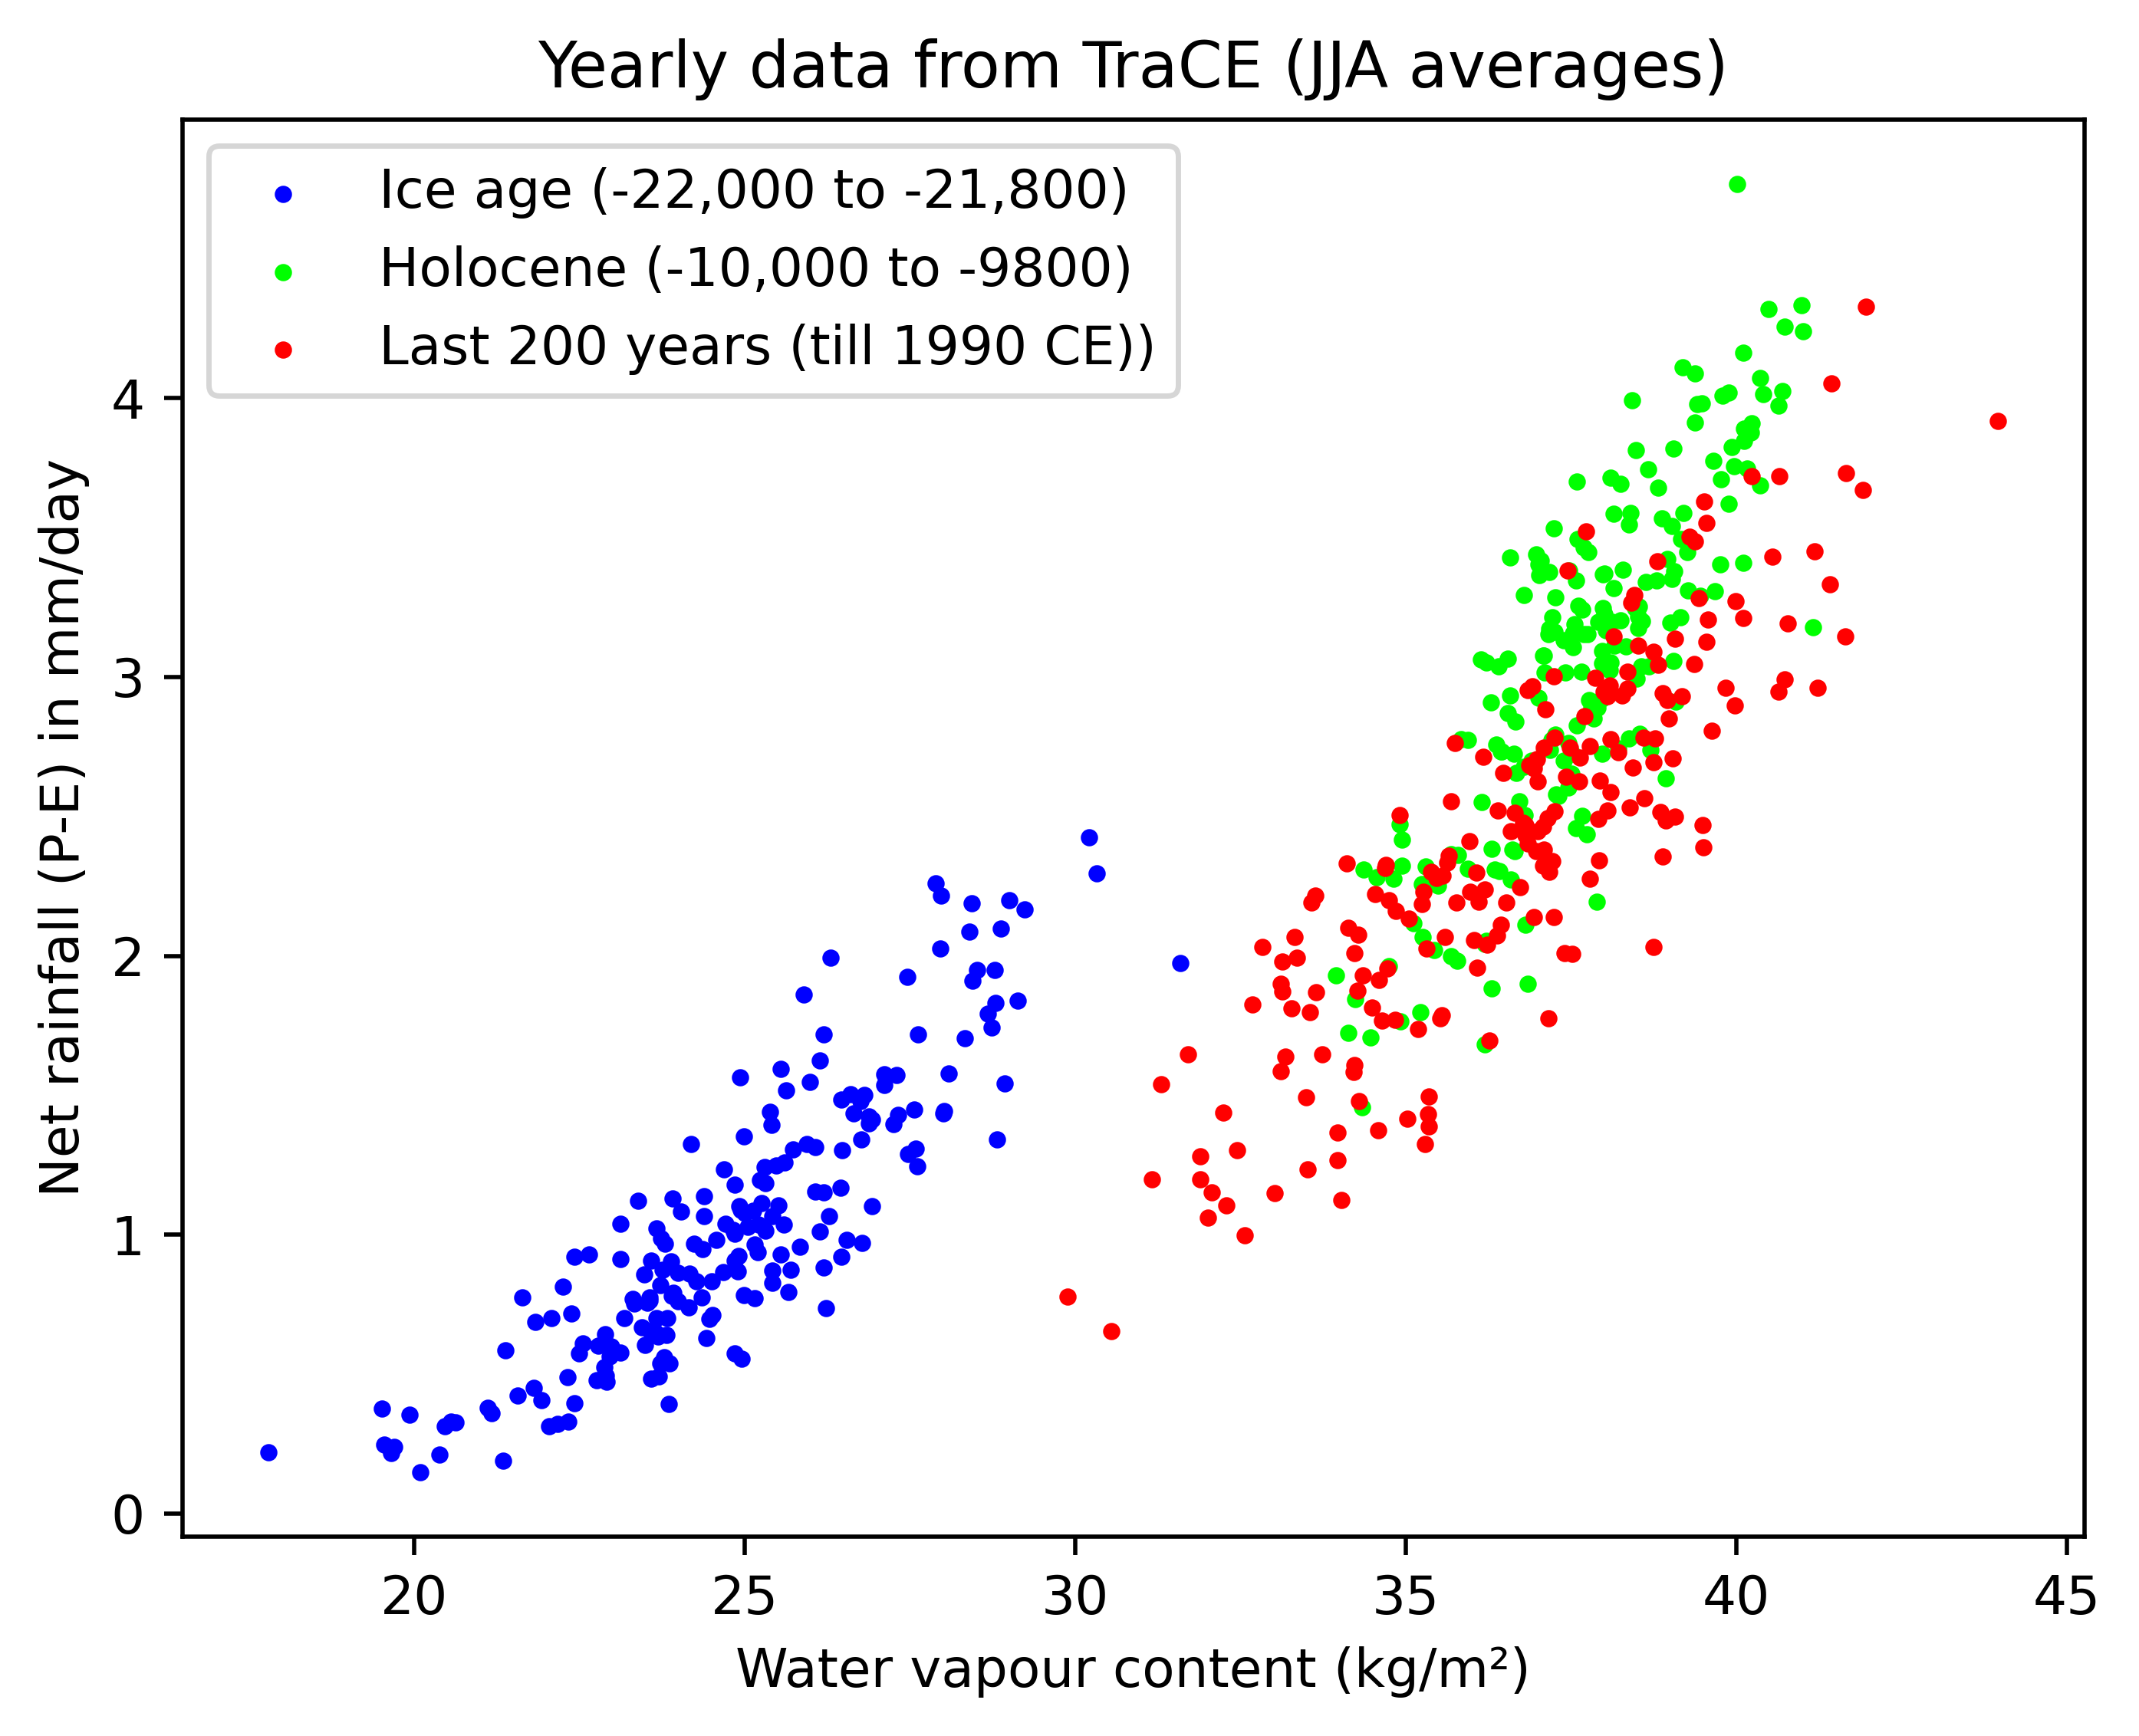

In [10]:
plt.scatter(x1, y1, c= 'b', s=5)
plt.scatter(x2, y2, c= 'lime', s=5)
plt.scatter(x3, y3, c= 'r', s=5)
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Net rainfall (P-E) in mm/day')
plt.legend(['Ice age (-22,000 to -21,800)', 'Holocene (-10,000 to -9800)', 'Last 200 years (till 1990 CE))'])
plt.title('Yearly data from TraCE (JJA averages)')

In [7]:
#Calculations of constants
def func(p, pwat, qnet):
    return ((qnet+p)*pwat)/p

out = np.average(func(np.array(P), np.array(Pwat), np.array(Qdiv)))
out1 = np.average(func(np.array(y1), np.array(x1), np.array(w1)))
out2 = np.average(func(np.array(y2), np.array(x2), np.array(w2)))
out3 = np.average(func(np.array(y3), np.array(x3), np.array(w3)))

Text(0.5, 1.0, 'Yearly data from TraCE (JJA averages)')

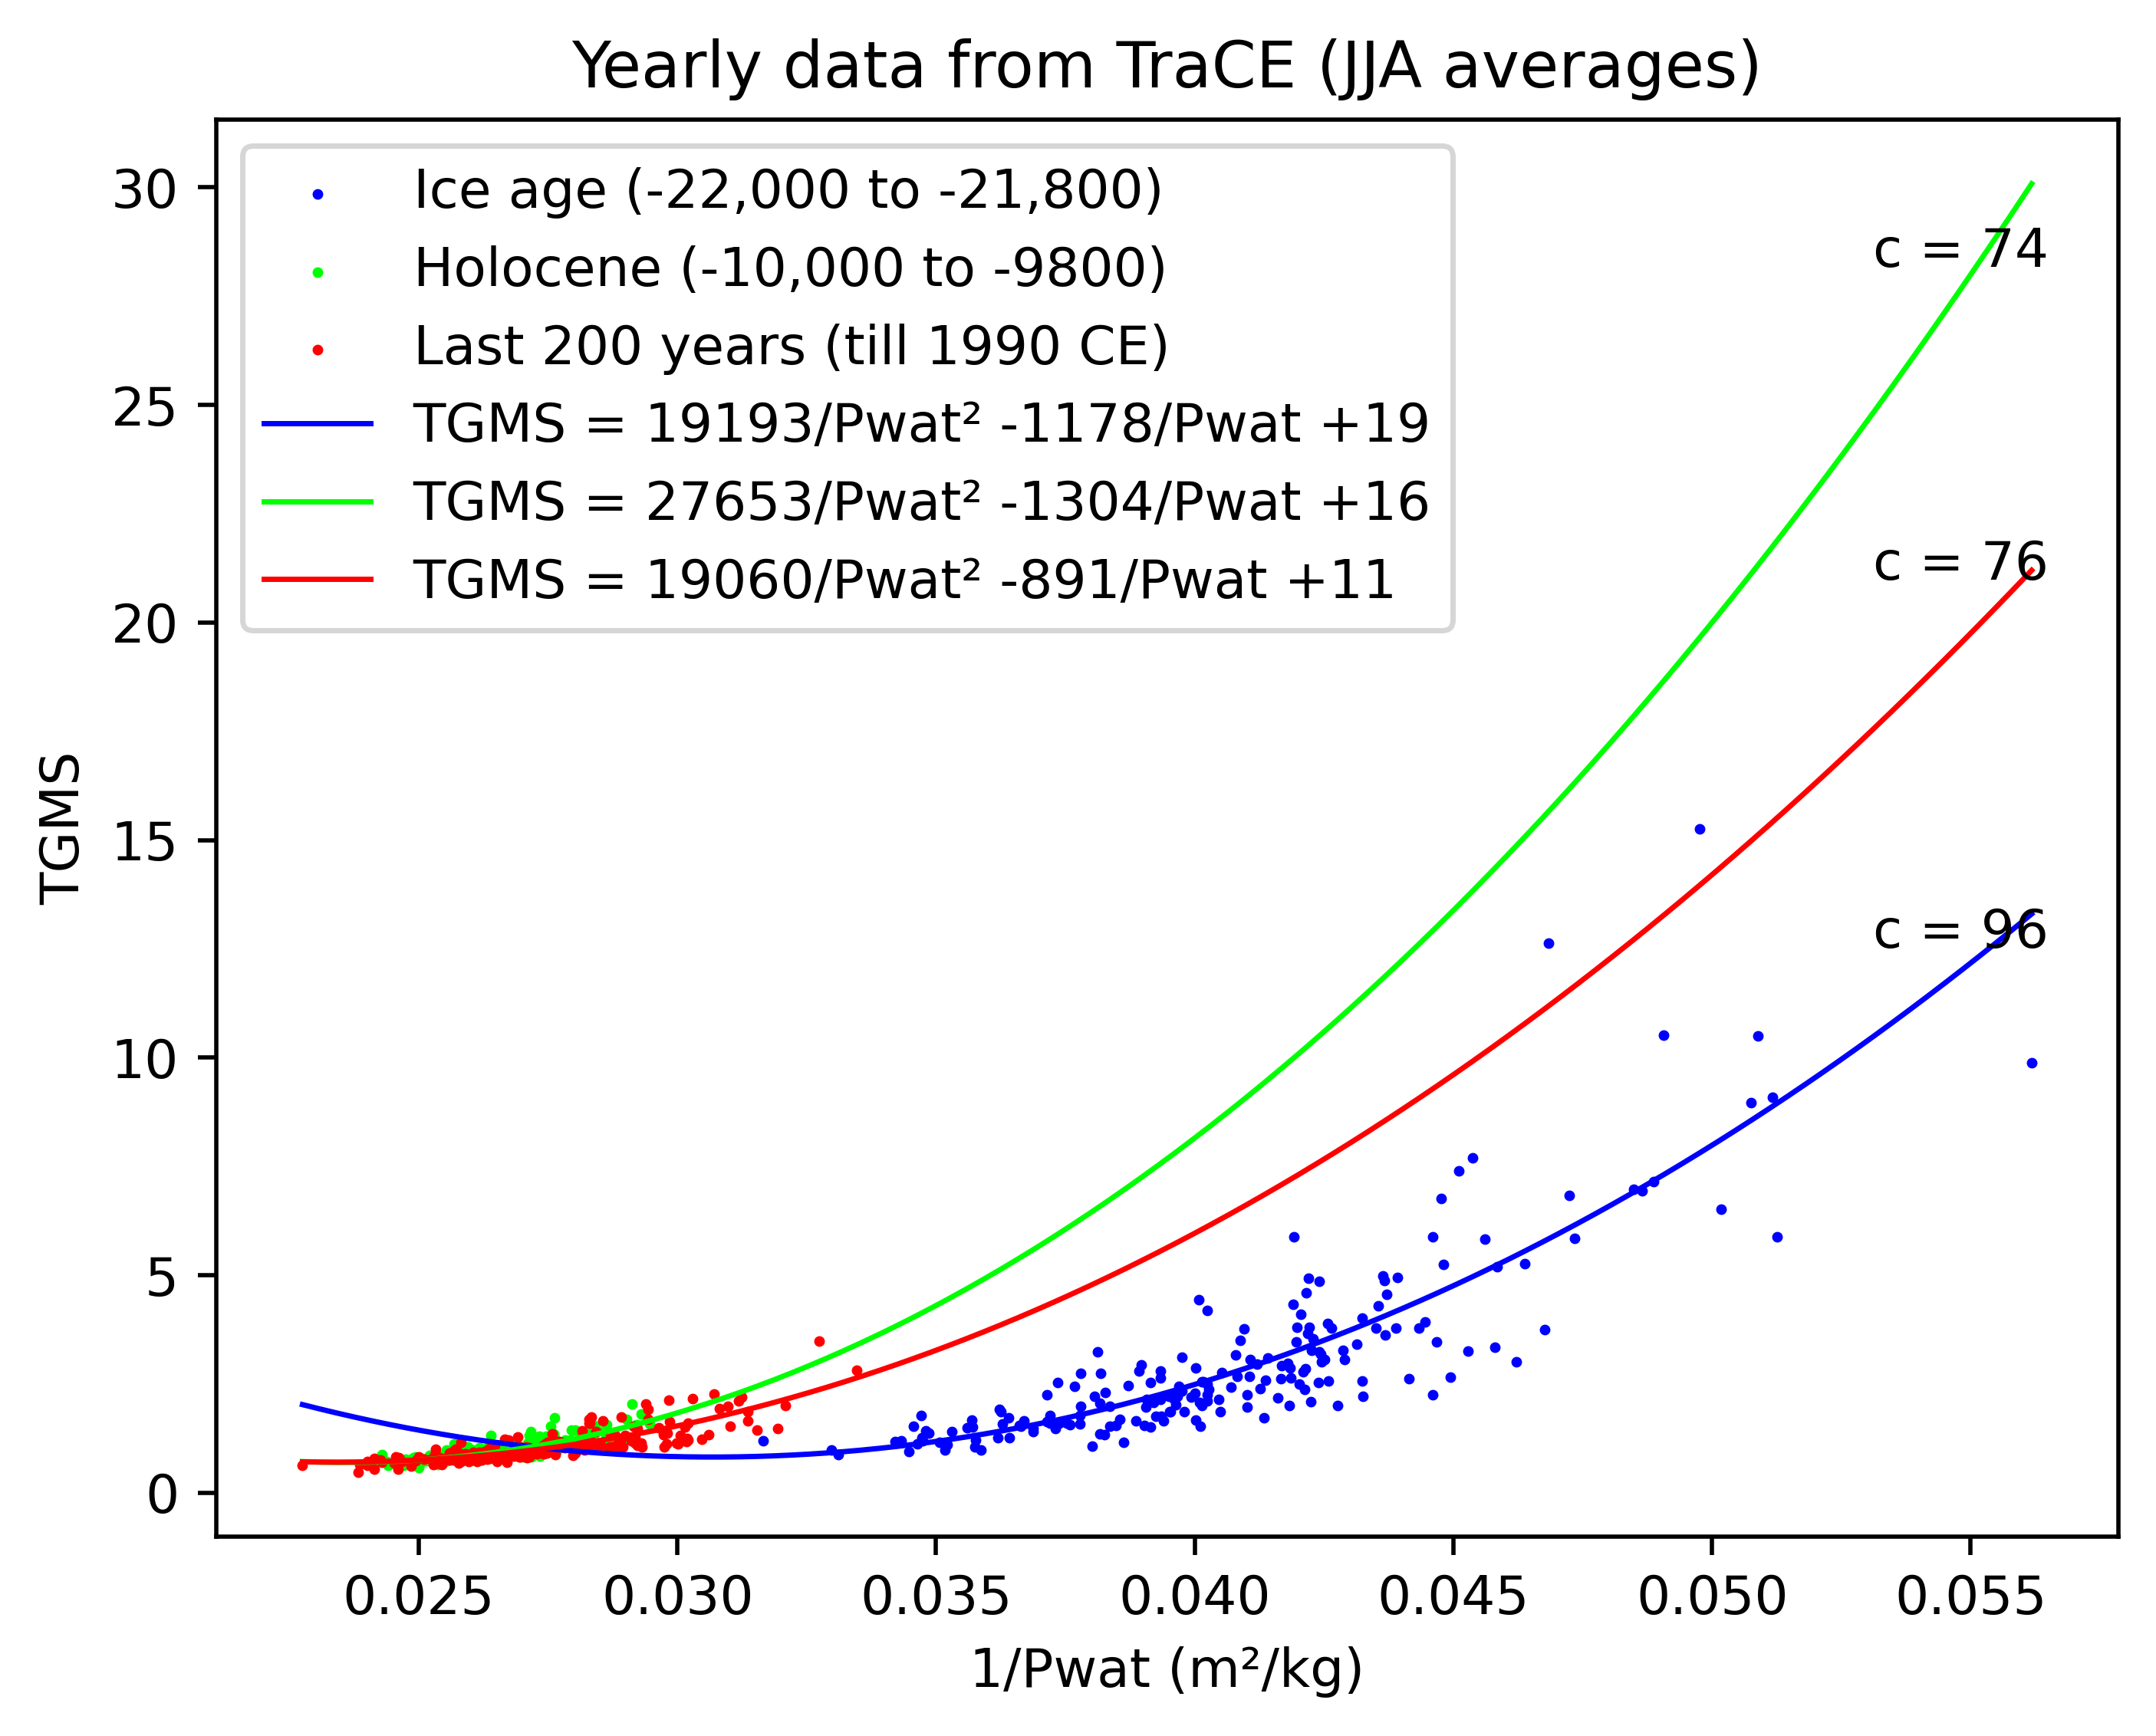

In [11]:
plot_settings1 = {'s':1}
plot_settings2 = {'linewidth':1}

plt.scatter(rec1, z1, c='b', label='Ice age (-22,000 to -21,800)', **plot_settings1)
plt.scatter(rec2, z2, c= 'lime', label='Holocene (-10,000 to -9800)', **plot_settings1)
plt.scatter(rec3, z3, c= 'r', label='Last 200 years (till 1990 CE)', **plot_settings1)
plt.plot(x_line, y_line1, c='b', label='TGMS = %.0f/Pwat\u00b2 %.0f/Pwat +%.0f' % (a1, b1, c1), **plot_settings2)
plt.plot(x_line, y_line2, c= 'lime', label='TGMS = %.0f/Pwat\u00b2 %.0f/Pwat +%.0f' % (a2, b2, c2), **plot_settings2)
plt.plot(x_line, y_line3,  c= 'r', label='TGMS = %.0f/Pwat\u00b2 %.0f/Pwat +%.0f' % (a3, b3, c3), **plot_settings2)
plt.figtext(0.80, 0.8, 'c = %.0f' % (out2))
plt.figtext(0.80, 0.63, 'c = %.0f' % (out3))
plt.figtext(0.80, 0.43, 'c = %.0f' % (out1))
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.ylabel('TGMS')
plt.legend()
plt.title('Yearly data from TraCE (JJA averages)')

Text(0.5, 1.0, 'Yearly data for -22,000 to 1990 CE (JJA averages)')

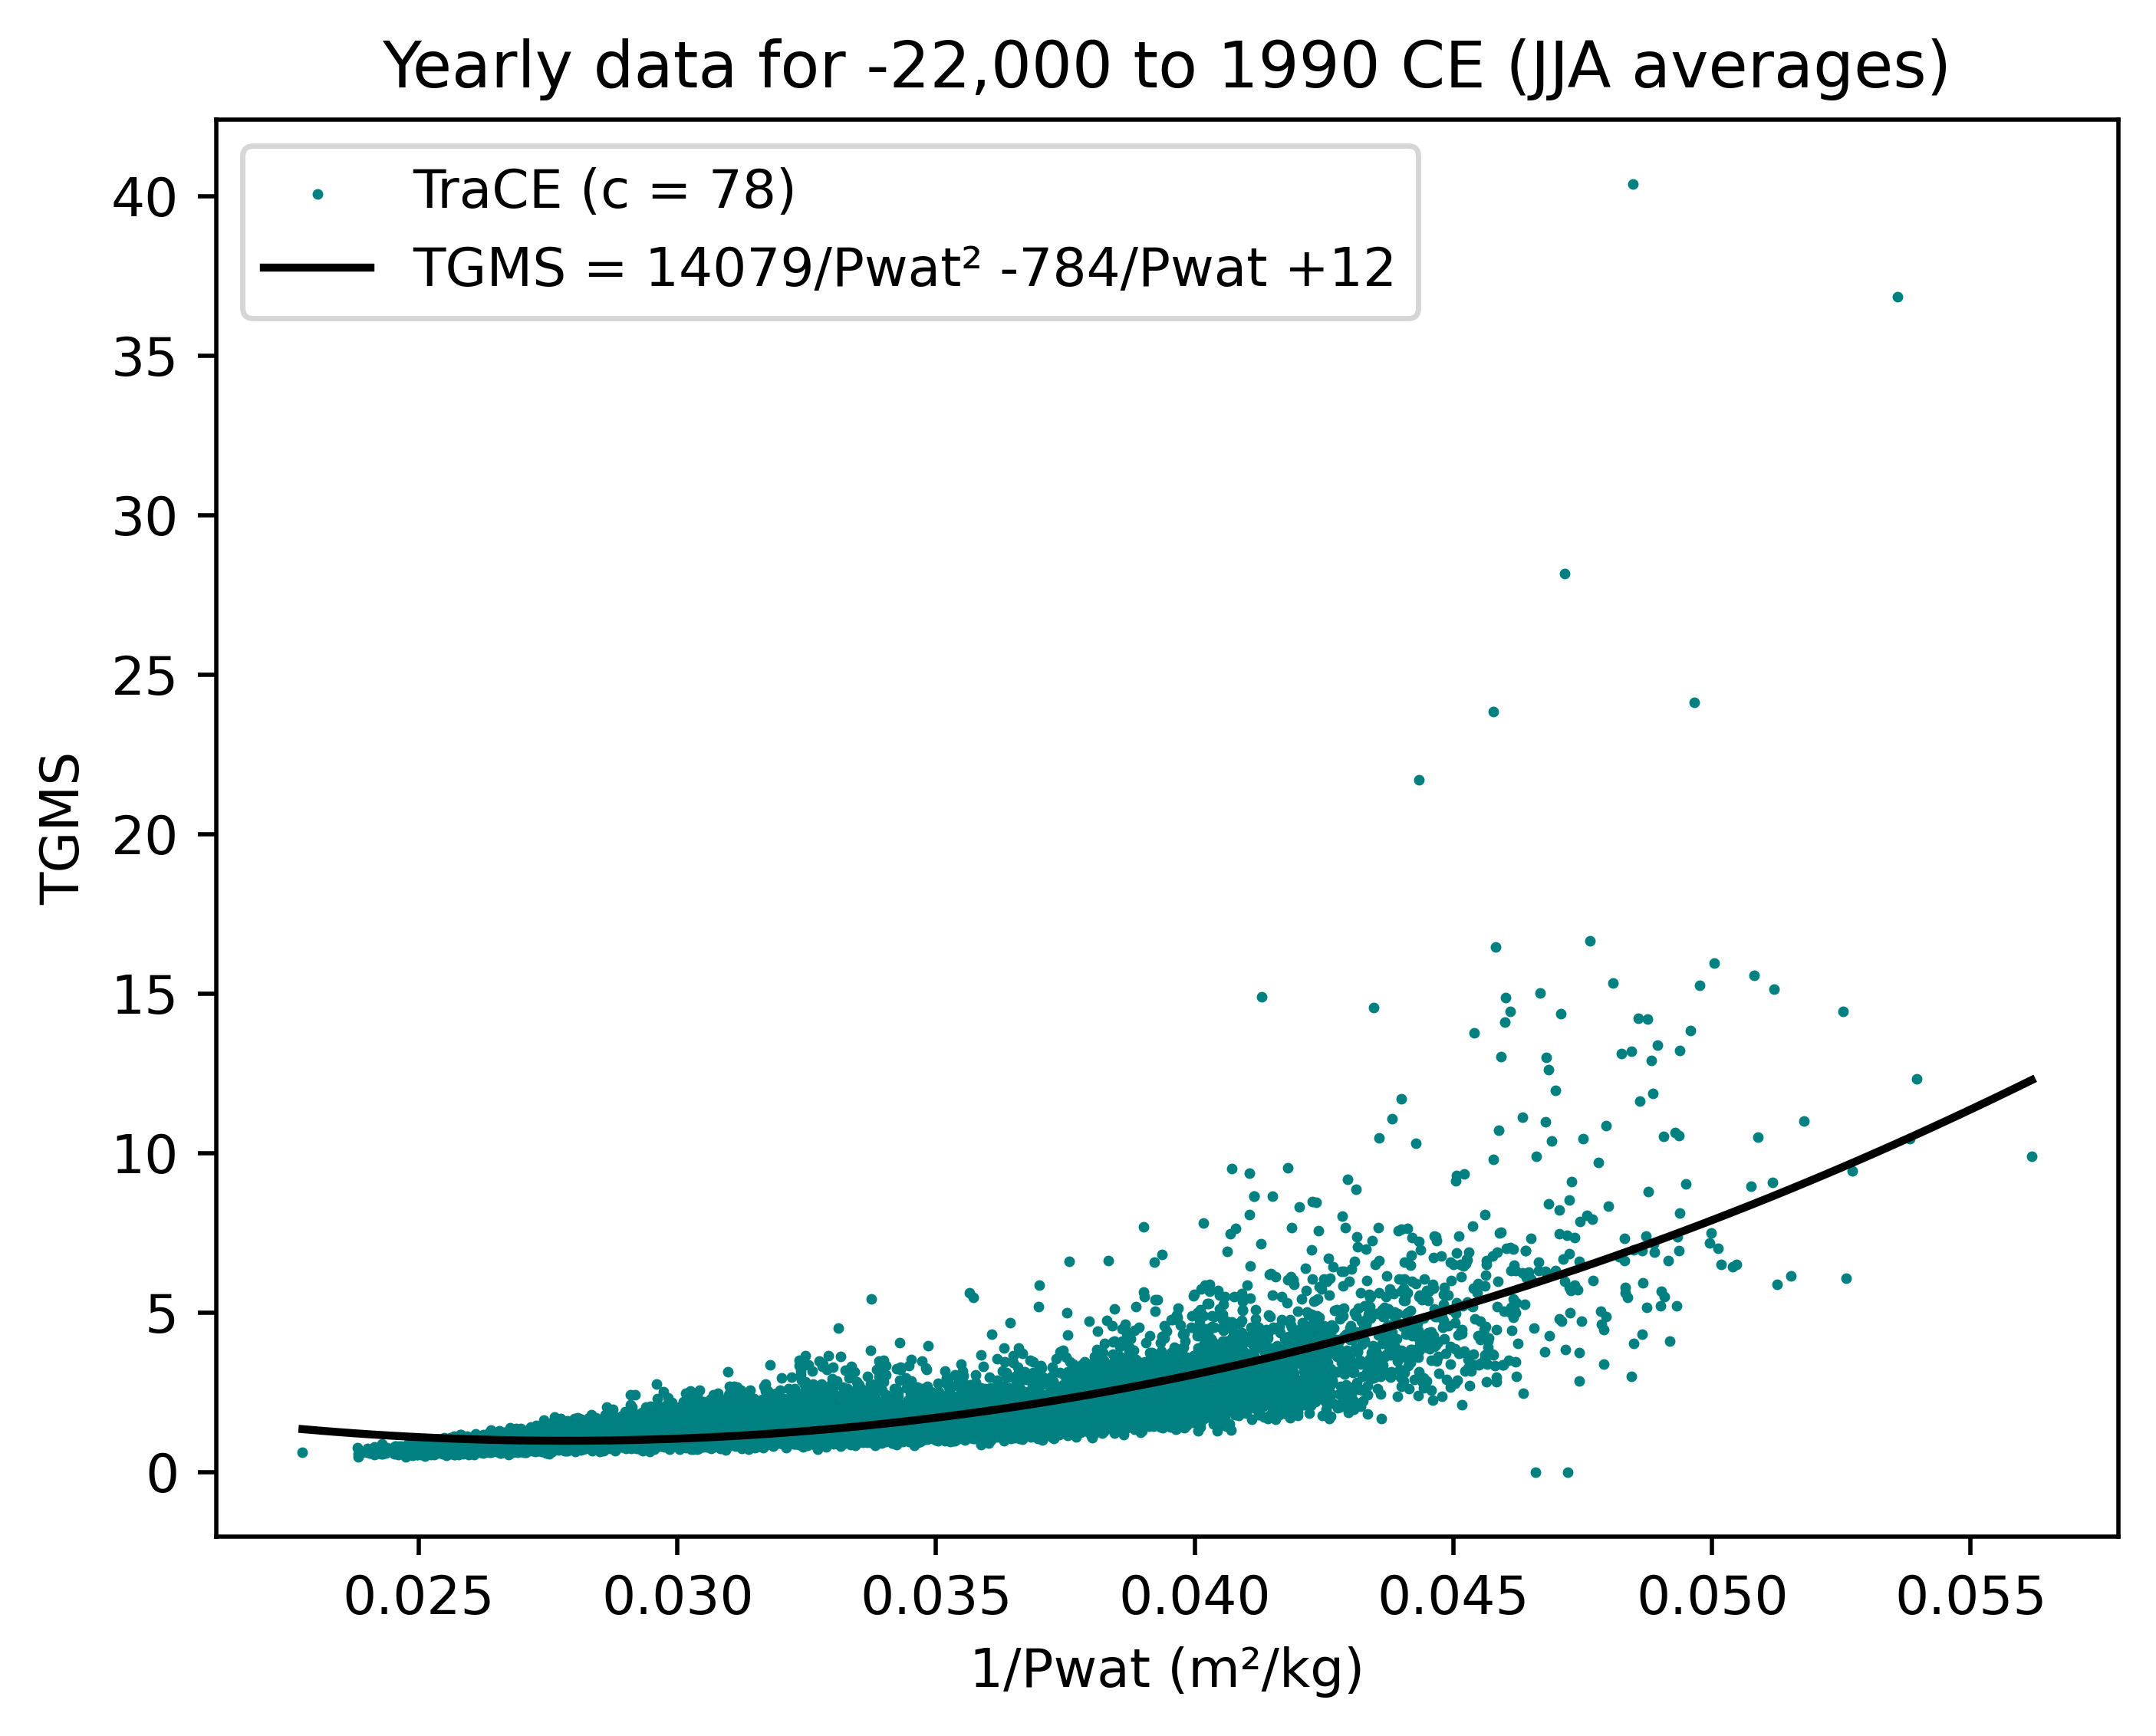

In [9]:
plt.scatter(rec, z, c= 'teal', s=1, label='TraCE (c = %.0f)' %(out))
plt.xlabel('1/Pwat (m\u00b2/kg)')
plt.ylabel('TGMS')
plt.plot(x_line, y_line, c='black', label='TGMS = %.0f/Pwat\u00b2 %.0f/Pwat +%.0f' % (a, b, c))
plt.legend()
plt.title('Yearly data for -22,000 to 1990 CE (JJA averages)')

Text(0.5, 1.0, 'Yearly data from TRACE (JJA averages)')

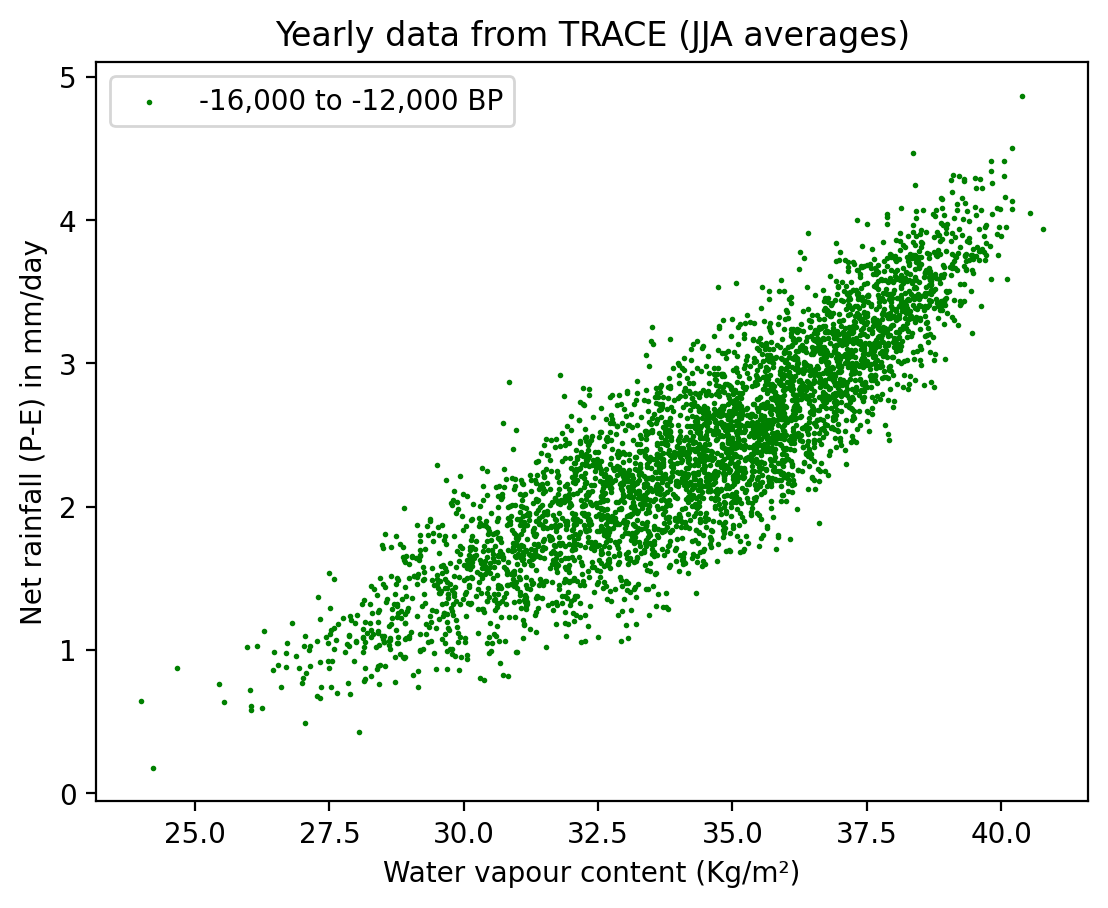

In [7]:
plt.scatter(Pwat1, P1, c= 'g', s=1)
plt.xlabel('Water vapour content (Kg/m\u00b2)')
plt.ylabel('Net rainfall (P-E) in mm/day')
plt.legend(['-16,000 to -12,000 BP'])
plt.title('Yearly data from TRACE (JJA averages)')

In [8]:
xavg=yavg=zavg=np.array([])
for i in range(0,40):
	df = df2.iloc[i*100:100+i*100,:]
	xavg = np.append(xavg, np.mean(df["Qdiv"].values))
	yavg = np.append(yavg, np.mean(df["Pwat"].values))
	zavg = np.append(zavg, np.mean(df["(P-E)"].values))

In [9]:
pred1 = []
rec = []
for i in range(len(yavg)):
    pred1.append((87/yavg[i])-1.43)
    rec.append(1/yavg[i])

In [10]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x1 = np.array(yavg).reshape(-1, 1)
y1 = np.array(zavg).reshape(-1, 1)
regr.fit(x1, y1)
xnew1 = np.linspace(np.min(x1), np.max(x1), 40).reshape(-1,1)
ynew1 = regr.predict(xnew1)
print(regr.intercept_)
print(regr.coef_)

[-3.88123554]
[[0.18340623]]


Text(0.5, 1.0, ' 100-year averages, -16,000 to -12,000 BP')

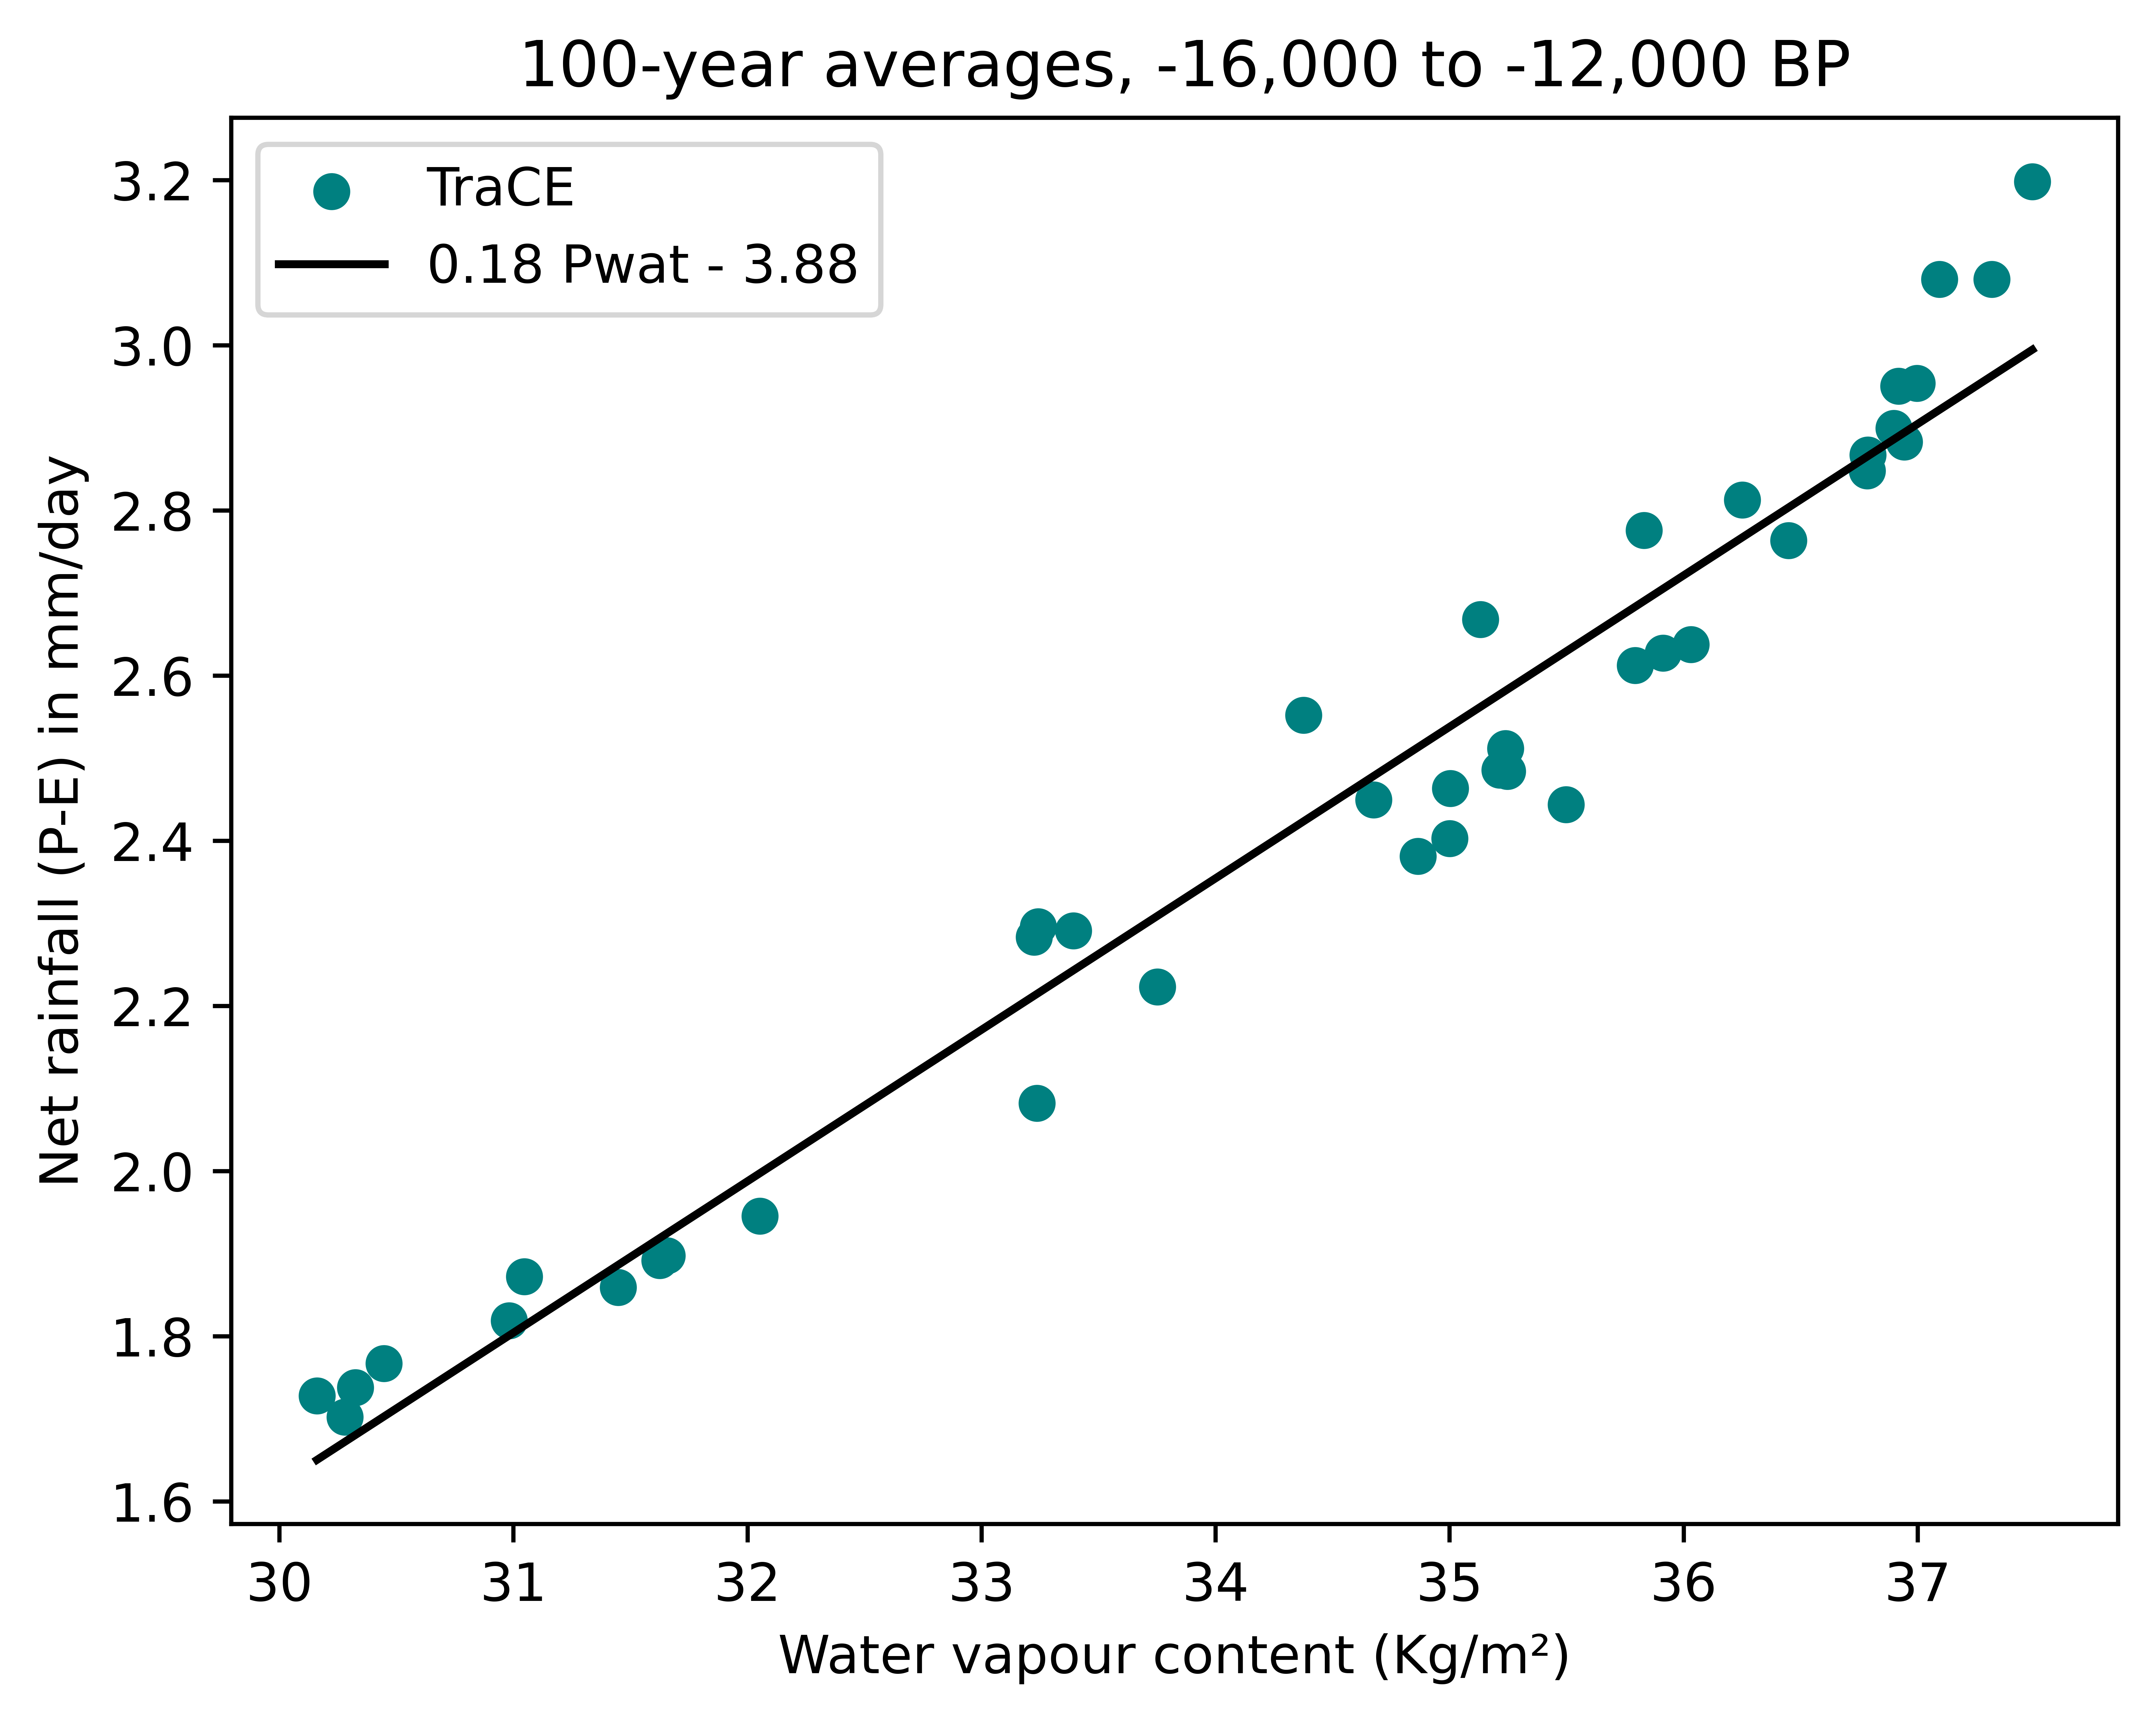

In [28]:
plt.scatter(yavg, zavg, c= 'teal', label = 'TraCE')
#plt.plot(yavg, pred1, c='r', label = "87/Pwat - 1.43")
plt.plot(xnew1, ynew1, c='black', label = "0.18 Pwat - 3.88")
#plt.scatter(yavg, pred2, label = "89/Pwat - 1.54")
plt.xlabel('Water vapour content (Kg/m\u00b2)')
plt.ylabel('Net rainfall (P-E) in mm/day')
plt.legend()
plt.title(' 100-year averages, -16,000 to -12,000 BP')

In [33]:
#NCEP
a = "/media/rakshith/Seagate Expansion Drive/mraks/land sea.nc"
b = "/media/rakshith/Seagate Expansion Drive/mraks/dswrf.ntat.nc"
c = "/media/rakshith/Seagate Expansion Drive/mraks/uswrf.ntat.nc"
d = "/media/rakshith/Seagate Expansion Drive/mraks/ulwrf.ntat.nc"
e = "/media/rakshith/Seagate Expansion Drive/mraks/lhtfl.nc" #this is the evaporation rate
f = "/media/rakshith/Seagate Expansion Drive/mraks/shtfl.nc"
g = "/media/rakshith/Seagate Expansion Drive/mraks/dswrf.sfc.nc"
h = "/media/rakshith/Seagate Expansion Drive/mraks/uswrf.sfc.nc"
i = "/media/rakshith/Seagate Expansion Drive/mraks/dlwrf.sfc.nc"
j = "/media/rakshith/Seagate Expansion Drive/mraks/ulwrf.sfc.nc"
k = "/media/rakshith/Seagate Expansion Drive/mraks/prate.nc"
l = "/media/rakshith/Seagate Expansion Drive/mraks/pr_wtr.nc"

f1 = netCDF4.Dataset(a)
f2 = netCDF4.Dataset(b)
f3 = netCDF4.Dataset(c)
f4 = netCDF4.Dataset(d)
f5 = netCDF4.Dataset(e)
f6 = netCDF4.Dataset(f)
f7 = netCDF4.Dataset(g)
f8 = netCDF4.Dataset(h)
f9 = netCDF4.Dataset(i)
f10 = netCDF4.Dataset(j)
f11 = netCDF4.Dataset(k)
f12 = netCDF4.Dataset(l)

In [34]:
lat = f12['lat'][:]
lon = f12['lon'][:]
for i in range(len(lon)):
    if lon[i]>180:
        lon[i]=lon[i]-360
        
lon_grid, lat_grid = np.meshgrid(lon,lat)
globe_land_mask = globe.is_land(lat_grid, lon_grid)
mask = globe_land_mask[24:33, 28:37]

In [55]:
Pwat = []
P = []
Qdiv = []
year = [1979, 2012]
end = [1988, 2021]

for i in range(len(year)):
    a = (year[i] - 1979)*12
    b = (end[i]-1979+1)*12
    for k in range(a, b, 12):
        #for j in range(k, k+12):
        for j in range(k+5, k+9):
            v1 = f1['land'][0, 31:42, 38:49]
            v2 = f2['dswrf'][j, 31:42, 38:49]
            v3 = f3['uswrf'][j, 31:42, 38:49]
            v4 = f4['ulwrf'][j, 31:42, 38:49]
            v5 = f5['lhtfl'][j, 31:42, 38:49]
            v6 = f6['shtfl'][j, 31:42, 38:49]
            v7 = f7['dswrf'][j, 31:42, 38:49]
            v8 = f8['uswrf'][j, 31:42, 38:49]
            v9 = f9['dlwrf'][j, 31:42, 38:49]
            v10 = f10['ulwrf'][j, 31:42, 38:49]
            v11 = f11['prate'][j, 31:42, 38:49]
            v12 = f12['pr_wtr'][j, 24:33, 28:37]
            x = np.multiply(v1, 86400*v11) #only P in mm/day
            y = np.multiply(v1, v2 - v3 - v4 + v5 + v6 - v7 + v8 - v9 + v10)
            z = np.multiply(mask, v12)
            P.append(np.average(x[np.nonzero(x)]))
            Qdiv.append(np.average(y[np.nonzero(y)]))
            Pwat.append(np.average(z[np.nonzero(z)]))
        

TGMS = []
for i in range(len(Qdiv)):
    TGMS.append(Qdiv[i]/P[i])

In [56]:
div = int((len(Pwat))/2)
x1, y1 = Pwat[:div], P[:div]
x2, y2 = Pwat[div:], P[div:]

 
def objective(x, a, b, c):
	return a * x**2 + b * x + c

popt1, _ = curve_fit(objective, x1, y1)
a1, b1, c1 = popt1
popt2, _ = curve_fit(objective, x2, y2)
a2, b2, c2 = popt2

print('y = %.5f * x + %.5f * x^2 + %.5f' % (a1, b1, c1))
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a2, b2, c2))

x_line = np.linspace(np.min(x1), np.max(x2), 100)
y_line1 = objective(x_line, a1, b1, c1)
y_line2 = objective(x_line, a2, b2, c2)

y = 0.01011 * x + -0.30351 * x^2 + 2.16177
y = -0.00054 * x + 0.44501 * x^2 + -10.94452


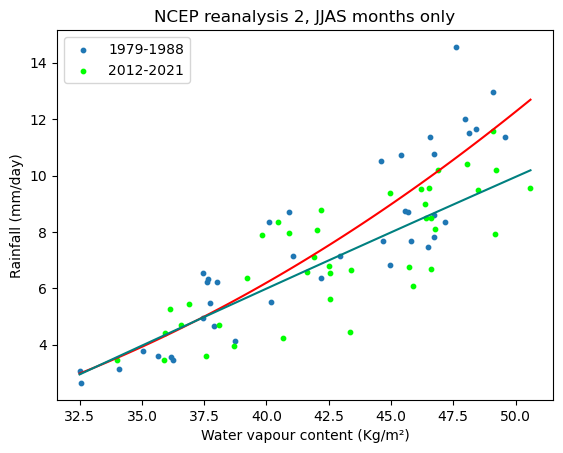

In [58]:
plt.plot(x_line, y_line1, color='red')
plt.plot(x_line, y_line2, color='teal')
plt.scatter(x1, y1, s=10, label='1979-1988')
plt.scatter(x2, y2, c='lime', s=10, label='2012-2021')
plt.xlabel('Water vapour content (Kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('NCEP reanalysis 2, JJAS months only') 
plt.legend()

In [5]:
#IMD vs ERA5
data3 = pd.read_csv('/media/rakshith/Windows/Users/mraks/ISMR rainfall.csv')
avg = data3.iloc[58:114, 13]

g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]

In [9]:
P = []
for i in range(0,756,12):
	sum1 = 0
	for j in range(i+5, i+9):
		v8 = f8['mtpr'][j, :, :]
		sum1 = sum1 + 86400*(v8)
	x = np.multiply(v1, sum1)
	P.append(np.average(x[np.nonzero(x)])/4)

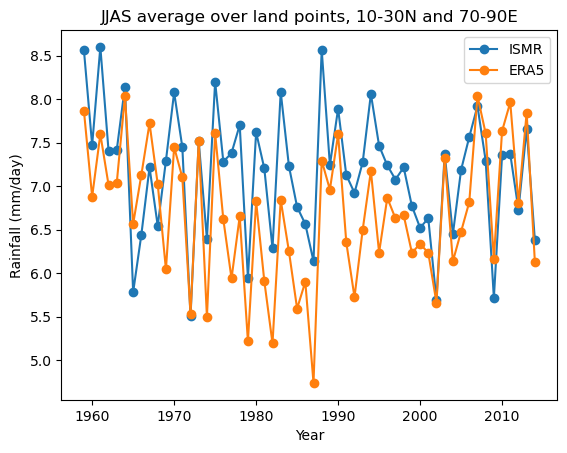

In [13]:
X = np.linspace(1959, 2014, 56)
plt.plot(X, avg, marker='o', label='ISMR')
plt.plot(X, P[:56], marker='o', label='ERA5')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm/day)')
plt.title("JJAS average over land points, 10-30N and 70-90E")
plt.legend()